<a href="https://colab.research.google.com/github/Namrata-cse/Wrappermethodsin-FS/blob/main/s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install ReliefF
!pip install -U Py_FS

     |████████████████████████████████| 48 kB 3.6 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=d3eecf31fe66171a146869b6505d6a204e3432e9ebb48062d2e41cb7efeca389
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF
     |████████████████████████████████| 9.5 MB 7.4 MB/s 


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
!pip install antropy
import pickle, copy
import numpy as np
import antropy as ent


import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split


     |████████████████████████████████| 49 kB 4.1 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=544135e5160bdd39638031f3daef285ecce258b51338528571225c569195a3da
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [16]:
deap_dataset_path = "/content/s01.dat"
subject_names = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 
                 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
                 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32']


In [17]:
with open ('/content/s01.dat','rb')as f:
    raw_data=pickle.load(f , encoding='latin1')

In [19]:
 # raw_data has two key 'data' and 'labels'
data = raw_data['data']
labels = raw_data['labels']

In [21]:
print(data)

[[[ 9.48231681e-01  1.65333533e+00  3.01372577e+00 ... -2.82648937e+00
   -4.47722969e+00 -3.67692812e+00]
  [ 1.24706590e-01  1.39008270e+00  1.83509881e+00 ... -2.98702069e+00
   -6.28780884e+00 -4.47429041e+00]
  [-2.21651099e+00  2.29201682e+00  2.74636923e+00 ... -2.63707760e+00
   -7.40651010e+00 -6.75590441e+00]
  ...
  [ 2.30779684e+02  6.96716323e+02  1.19512165e+03 ...  1.01080949e+03
    1.28312149e+03  1.51996480e+03]
  [-1.54180981e+03 -1.61798052e+03 -1.69268642e+03 ... -1.57842691e+04
   -1.57823160e+04 -1.57808512e+04]
  [ 6.39054310e-03  6.39054310e-03  6.39054310e-03 ... -9.76081241e-02
   -9.76081241e-02 -9.76081241e-02]]

 [[ 1.02601750e+01  1.27954427e+01  1.04261916e+01 ...  6.02219406e+00
    7.53913583e+00  9.35224904e+00]
  [ 9.49186875e+00  1.25897704e+01  1.05740268e+01 ...  6.03399490e+00
    9.06874552e+00  8.74021419e+00]
  [ 7.12867480e+00  1.22064700e+01  9.49646701e+00 ...  6.17971667e+00
    6.93374514e+00  6.48086477e+00]
  ...
  [ 1.91950410e+03  3.5

In [20]:
reduced_eeg_data  = data[0:40, 0:32, 384:8064]
reduced_eeg_data.shape


(40, 32, 7680)

In [22]:
print(reduced_eeg_data.shape)

(40, 32, 7680)


In [23]:
print(labels.shape)

(40, 4)


In [24]:
type(data)

numpy.ndarray

In [25]:
type(labels)

numpy.ndarray

In [ ]:
print(labels)

In [26]:
print(data[0].shape)

(40, 8064)


In [27]:
print(reduced_eeg_data[0].shape)

(32, 7680)


In [32]:
def petrosian_fd(data, axis=-1):
    # Petrosian fractal dimension
    x = np.asarray(data)
    N = x.shape[axis]
    nzc_deriv = ent.num_zerocross(np.diff(x, axis=axis), axis=axis) # Number of sign changes in the first derivative of the signal
    pfd = np.log10(N) / (np.log10(N) + np.log10(N / (N + 0.4 * nzc_deriv)))
    return pfd

In [33]:
window = 4 # fix window size
pfd_features = []
for video_no in range(0, 40):
    for channel_no in range(0, 32):
        input_data = reduced_eeg_data[video_no][channel_no]
        no_data_in_each_window = int(input_data.shape[0]/4)
        for i in range(window):
            pfd = petrosian_fd(input_data[i*window: window*(i+1)])
            pfd_features.append(pfd)

In [34]:
def emotion_label(labels, class_label):
    em_labels = []
    if(class_label == 'valence'):
        for i in range(0, labels.shape[0]):
            if (labels[i][0]>5): # high valence
                em_labels.append(1)
            else: # low valence
                em_labels.append(0)
        return em_labels
    elif(class_label == 'arousal'):
        for i in range(0, labels.shape[0]):
            if (labels[i][1]>5): # high arousal
                em_labels.append(1)
            else: # low arousal
                em_labels.append(0)
        return em_labels
    elif(class_label == 'all'):
        for i in range(0, labels.shape[0]):
            if (labels[i][0]>5): # high valence
                if(labels[i][1]>5): # high arousal
                    em_labels.append(1) # HVHA
                else:
                    em_labels.append(0) # HVLA
            else: # low valence
                if(labels[i][1]>5): # high arousal
                    em_labels.append(2) # LVHA
                else: # low arousal
                    em_labels.append(3) # LVLA
        return em_labels

In [35]:
# # Method-2

pfd_m2 = np.array(pfd_features)
pfd_m2 = np.reshape(pfd_m2, (160, 32))
print(pfd_m2.shape)
valence_label2 = emotion_label(labels, "valence")
x = pfd_m2
y = []
for i in range(len(valence_label2)):
    for j in range(window):
        y.append(valence_label2[i])
y = np.array(y)
valence_label2 = y


(160, 32)


In [36]:
columns_name2 = []
for i in range(32):
    columns_name2.append('ch' + str(i))


df2 = pd.DataFrame(pfd_m2, columns = columns_name2)


tot_features = len(df2.columns)-1
total_features = tot_features
x = df2
x, y = shuffle(x, valence_label2 , random_state = 40)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)


In [37]:
print(pfd_m2)

[[1.         1.         1.         ... 1.07382753 1.15143328 1.07382753]
 [1.         1.         1.         ... 1.07382753 1.07382753 1.07382753]
 [1.         1.         1.         ... 1.15143328 1.         1.        ]
 ...
 [1.07382753 1.07382753 1.         ... 1.07382753 1.07382753 1.07382753]
 [1.07382753 1.07382753 1.         ... 1.15143328 1.15143328 1.07382753]
 [1.         1.         1.         ... 1.         1.         1.07382753]]


In [38]:
print(x_train)

          ch0       ch1       ch2       ch3       ch4       ch5       ch6  \
112  1.073828  1.073828  1.000000  1.073828  1.073828  1.073828  1.073828   
99   1.000000  1.073828  1.000000  1.073828  1.000000  1.073828  1.073828   
156  1.073828  1.073828  1.073828  1.151433  1.073828  1.073828  1.073828   
9    1.000000  1.073828  1.000000  1.073828  1.000000  1.073828  1.073828   
31   1.073828  1.000000  1.000000  1.073828  1.073828  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
80   1.000000  1.073828  1.073828  1.073828  1.073828  1.073828  1.073828   
145  1.000000  1.000000  1.000000  1.000000  1.151433  1.000000  1.000000   
16   1.000000  1.073828  1.151433  1.000000  1.000000  1.073828  1.151433   
110  1.073828  1.000000  1.000000  1.000000  1.073828  1.000000  1.000000   
119  1.073828  1.000000  1.000000  1.000000  1.000000  1.000000  1.151433   

          ch7       ch8       ch9  ...      ch22      ch23      ch24  \
112

Weight for the classification accuracy [0-1]: 1
Enter the percentage of data wanted for valdiation [0, 100]: 40

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.703125
Number of Features: 26
----------------------------------------

Mayfly 1 - Fitness: 0.703125, Number of Features: 26
Mayfly 2 - Fitness: 0.703125, Number of Features: 26
Mayfly 3 - Fitness: 0.703125, Number of Features: 26
Mayfly 4 - Fitness: 0.625, Number of Features: 24
Mayfly 5 - Fitness: 0.609375, Number of Features: 16
Mayfly 6 - Fitness: 0.59375, Number of Features: 19
Mayfly 7 - Fitness: 0.578125, Number of Features: 23
Mayfly 8 - Fitness: 0.5625, Number of Features: 20
Mayfly 9 - Fitness: 0.5625, Number of Features: 20
Mayfly 10 - Fitness: 0.5625, Number of Features: 25
Mayfly 11 - Fitness: 0.5625, Number of Features: 28
Mayfly 12 - Fitness: 0.546875, Number of Features: 22
Mayfly 13 - Fitness: 0.546875, Number of Features: 22
Mayfly 14 - Fitnes

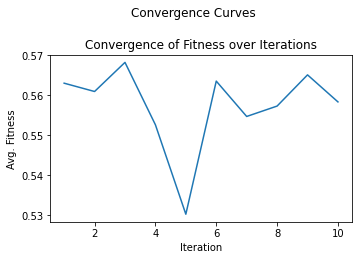

In [70]:
from Py_FS.wrapper.nature_inspired.MA import MA as FS
solution = FS(num_agents=30, max_iter=10, train_data=x, train_label=y, save_conv_graph=True)

In [72]:
solution.best_agent

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [63]:
from Py_FS.filter import MI as FS

solution = FS(x, y)

In [73]:
solution.ranks

AttributeError: ignored

In [74]:
solution.best_accuracy

0.703125

In [76]:
solution.final_population

array([[0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.

In [77]:
solution.final_fitness

array([0.609375, 0.609375, 0.609375, 0.59375 , 0.59375 , 0.59375 ,
       0.59375 , 0.59375 , 0.578125, 0.578125, 0.578125, 0.5625  ,
       0.5625  , 0.5625  , 0.546875, 0.546875, 0.546875, 0.546875,
       0.546875, 0.546875, 0.546875, 0.546875, 0.53125 , 0.53125 ,
       0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625])

In [78]:
solution.final_accuracy

array([0.609375, 0.609375, 0.609375, 0.59375 , 0.59375 , 0.59375 ,
       0.59375 , 0.59375 , 0.578125, 0.578125, 0.578125, 0.5625  ,
       0.5625  , 0.5625  , 0.546875, 0.546875, 0.546875, 0.546875,
       0.546875, 0.546875, 0.546875, 0.546875, 0.53125 , 0.53125 ,
       0.515625, 0.515625, 0.515625, 0.515625, 0.515625, 0.515625])

In [79]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, stratify=y, test_size=0.2, random_state=2)

In [80]:
from  Py_FS.evaluation import evaluate

In [82]:
print(train_X)

          ch0       ch1       ch2       ch3       ch4       ch5       ch6  \
138  1.073828  1.000000  1.073828  1.000000  1.073828  1.151433  1.073828   
62   1.073828  1.073828  1.073828  1.073828  1.073828  1.073828  1.073828   
63   1.000000  1.073828  1.073828  1.073828  1.000000  1.073828  1.073828   
6    1.073828  1.073828  1.073828  1.000000  1.073828  1.073828  1.073828   
96   1.073828  1.000000  1.073828  1.073828  1.000000  1.073828  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
43   1.000000  1.000000  1.073828  1.000000  1.073828  1.073828  1.000000   
34   1.073828  1.073828  1.073828  1.073828  1.073828  1.073828  1.073828   
133  1.000000  1.000000  1.000000  1.000000  1.151433  1.000000  1.151433   
119  1.073828  1.000000  1.000000  1.000000  1.000000  1.000000  1.151433   
94   1.073828  1.000000  1.000000  1.073828  1.000000  1.000000  1.000000   

          ch7       ch8       ch9  ...      ch22      ch23      ch24  \
138

In [84]:
type(train_X)

pandas.core.frame.DataFrame

In [85]:
type(x)

pandas.core.frame.DataFrame

In [86]:
X_train = train_X.to_numpy()

In [89]:
type(test_X)

pandas.core.frame.DataFrame

In [91]:
type(train_Y)

numpy.ndarray

In [90]:
X_test = test_X.to_numpy()

In [87]:
X=x.to_numpy()

In [83]:
print(x)

          ch0       ch1       ch2       ch3       ch4       ch5       ch6  \
23   1.073828  1.073828  1.073828  1.073828  1.073828  1.000000  1.000000   
18   1.073828  1.073828  1.073828  1.073828  1.000000  1.073828  1.073828   
5    1.073828  1.151433  1.073828  1.073828  1.073828  1.073828  1.073828   
103  1.000000  1.073828  1.000000  1.073828  1.000000  1.000000  1.000000   
142  1.073828  1.073828  1.073828  1.073828  1.151433  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
71   1.073828  1.151433  1.073828  1.000000  1.073828  1.073828  1.000000   
12   1.073828  1.000000  1.000000  1.073828  1.073828  1.151433  1.073828   
50   1.073828  1.073828  1.073828  1.073828  1.073828  1.073828  1.073828   
7    1.073828  1.073828  1.000000  1.000000  1.151433  1.073828  1.073828   
70   1.000000  1.073828  1.000000  1.151433  1.000000  1.073828  1.073828   

          ch7       ch8       ch9  ...      ch22      ch23      ch24  \
23 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


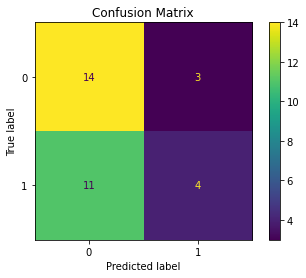

In [92]:
if(len(np.unique(test_Y))) == 2:
  # if it is binary classification, you will get a precision, recall and f1_score for each of the labels
  result = evaluate(X_train, X_test, train_Y, test_Y, agent=solution.best_agent, classifier='knn', save_conf_mat=True)
else:  
  # for a multi-class problem, you will get a avreaged precision, recall and f1_score
  # Options for averaging:
  # 1. macro
  # 2. weighted
  # 3. samples
  result = evaluate(X_train, X_test, train_Y, test_Y, agent=solution.best_agent, classifier='knn', save_conf_mat=True, averaging="weighted")

In [93]:
result.predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [94]:
result.accuracy

0.5625